In [248]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [249]:
# defining variables
per = 0.587 # perihelion distance
e = 0.967 # eccentricity
P = 76 # period
a = per/(1-e) # semi-major axis

In [265]:
# function to find the mean anomoly

def mean_anomoly(time):
    M = ((2 * np.pi) * (time/P)) % (2 * np.pi)
    return M

In [511]:
# creating a time array

time = np.linspace(0, 76*50, 1525)

In [512]:
# mean anomoly array

M = mean_anomoly(time)

In [513]:
print(M)

[0.00000000e+00 2.06141250e-01 4.12282500e-01 ... 5.87090281e+00
 6.07704406e+00 1.42108547e-14]


In [514]:
# function for eccentritc anomoly

def eccentic_anomoly(mean_anomoly):
    E0 = mean_anomoly
    # for loop
    for n in range(100):
        E = E0 - ((E0 - (e * np.sin(E0)) - mean_anomoly) / (1 - (e * np.cos(E0))))
        E0 = E
    return E

In [515]:
# eccentric anomoly array

E = eccentic_anomoly(M)

In [516]:
print(E)

[0.00000000e+00 1.04016871e+00 1.35733499e+00 ... 4.92585031e+00
 5.24301659e+00 4.30631961e-13]


In [517]:
# function to get true anomoly

def true_anomoly(eccentic_anomoly):
    theta = 2 * np.arctan(np.sqrt((1 + e)/(1 - e)) * np.tan(E/2))
    return theta

In [518]:
# true anomoly array

theta = true_anomoly(E)
#theta_rad = theta * (np.pi/180)

In [519]:
# elliptical orbit array
r = (a * (1 - (e**2))) / (1 + (e * np.cos(theta)))

In [520]:
# converting to cartesian coordinates

x = r * np.cos(theta)
y = r * np.sin(theta)

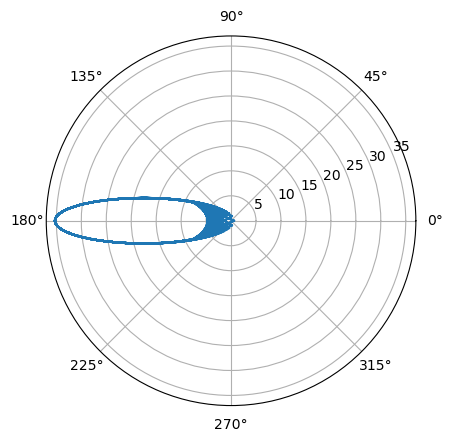

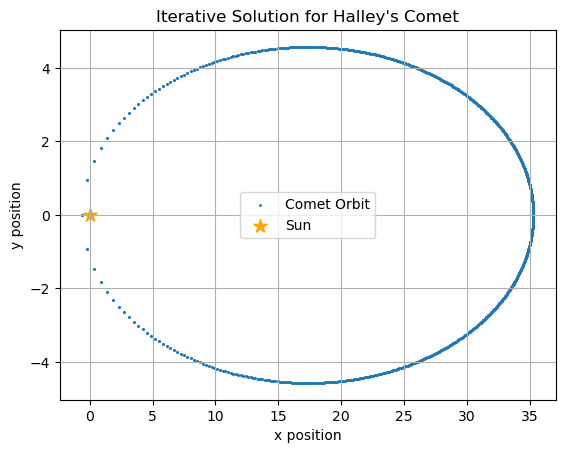

In [526]:
# plotting the orbit

#plt.axes(projection = 'polar')
plt.figure()
plt.polar(theta, r)
plt.figure()
plt.scatter(-x, y, s = 1, label = 'Comet Orbit')
plt.scatter(0, 0, color = 'orange', s = 100, marker = '*', label = 'Sun')
plt.grid()
plt.title("Iterative Solution for Halley's Comet")
plt.xlabel('x position')
plt.ylabel('y position')
plt.legend()

In [503]:
# Order 4 Runge-Kutta

from scipy.integrate import solve_ivp

G = 4 * (np.pi**2)
Msun = 1 # 1.989 * (10**30)
per = 0.587
e = 0.967
P = 76
a = P**(2/3)

t_span = (0, P)

In [504]:
def halley_motion(t, y):
    x, y, vx, vy = y
    r = np.sqrt(x**2 + y**2)
   
    ax = -((G * Msun) / (r**3)) * x
    ay = -((G * Msun) / (r**3)) * y
    return [vx, vy, ax, ay]

In [505]:
x0 = per
y0 = 0.0
vx0 = a * (1 - e)
vy0 = 0
ax0 = 0
ay0 = np.sqrt((G * Msun) * ((1 + e) / (a * (1 - e))))

initial_conditions = [vx0, vy0, ax0, ay0]

print(initial_conditions)

[0.5920926474186894, 0, 0, 11.452154918428148]


In [506]:
sol = solve_ivp(halley_motion, t_span, initial_conditions, method='RK45', dense_output=True, max_step = 0.05)

Text(0, 0.5, 'y position')

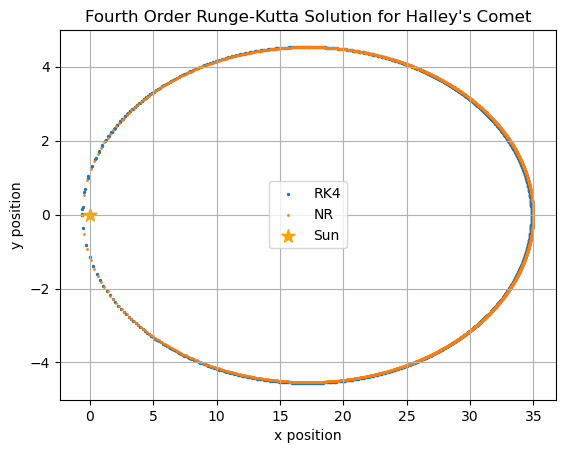

In [508]:
x_RK4 = sol.y[0]
y_RK4 = sol.y[1]

t_array = np.linspace(0, P, np.size(x_RK4))
x_array = np.abs(x_RK4)

plt.scatter(-x_RK4, y_RK4, s = 2, label = 'RK4')
plt.scatter(0, 0, color = 'orange', marker = '*', s = 100, label = 'Sun')
plt.grid()
plt.legend()
plt.title("Fourth Order Runge-Kutta Solution for Halley's Comet")
plt.xlabel('x position')
plt.ylabel('y position')

Text(0, 0.5, 'y position')

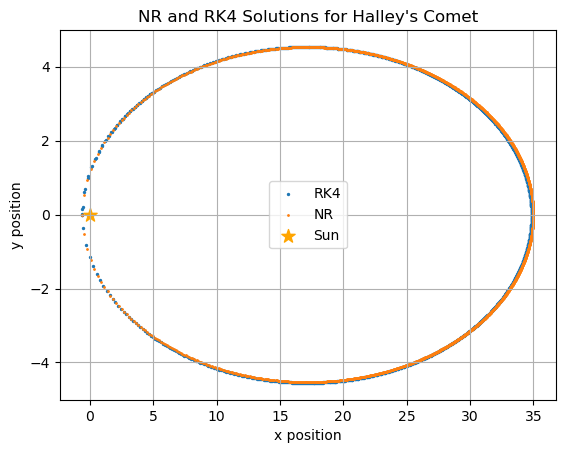

In [510]:
plt.scatter(-x_RK4, y_RK4, s = 2, label = 'RK4')
plt.scatter(-x, y, s = 1, label = 'NR')
plt.scatter(0, 0, color = 'orange', marker = '*', s = 100, label = 'Sun')
plt.grid()
plt.legend()
plt.title("NR and RK4 Solutions for Halley's Comet")
plt.xlabel('x position')
plt.ylabel('y position')

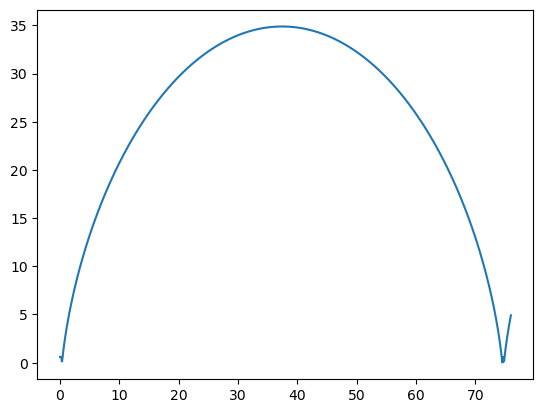

In [410]:
plt.plot(t_array, x_array)

In [413]:
dx = x_RK4 - x
dy = y_RK4 - y

In [414]:
err_mag = np.sqrt(dx ** 2 + dy ** 2)

In [415]:
cerror = np.cumsum(err_mag)

Text(0, 0.5, 'Accumulated Error')

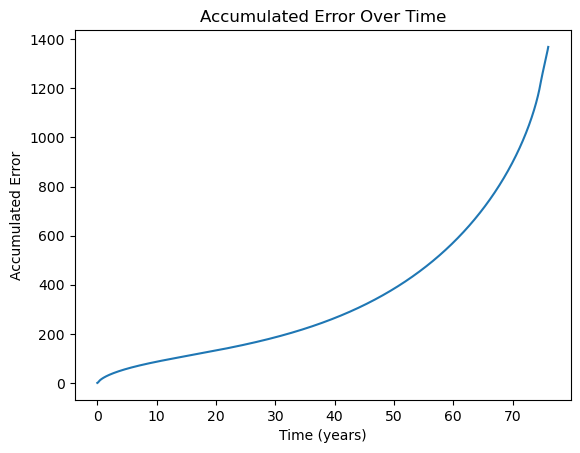

In [419]:
plt.plot(t_array, cerror)
plt.title('Accumulated Error Over Time')
plt.xlabel('Time (years)')
plt.ylabel('Accumulated Error')

In [420]:
# testing stability

per = 0.587 # perihelion distance
e = 0.967 # eccentricity
P = 76 # period
a = per/(1-e) # semi-major axis

In [478]:
# RK4

t_span = (0, P*5)
sol_RK = solve_ivp(halley_motion, t_span, initial_conditions, method='RK45', dense_output=True, max_step = 0.05)

Text(0, 0.5, 'y position')

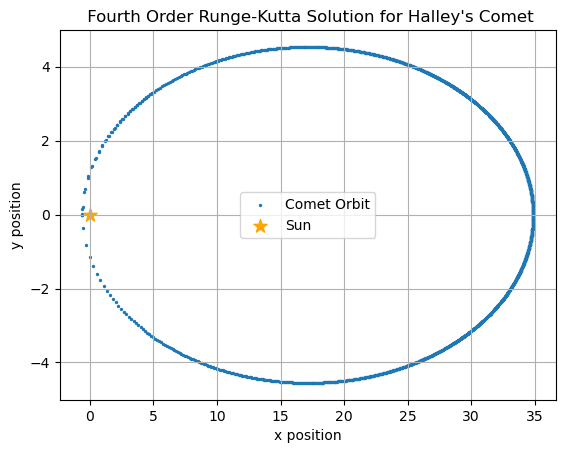

In [479]:
x_RK4 = sol_RK.y[0]
y_RK4 = sol_RK.y[1]

plt.scatter(-x_RK4, y_RK4, s = 2, label = 'Comet Orbit')
plt.scatter(0, 0, color = 'orange', marker = '*', s = 100, label = 'Sun')
plt.grid()
plt.legend()
plt.title(" Fourth Order Runge-Kutta Solution for Halley's Comet")
plt.xlabel('x position')
plt.ylabel('y position')

In [527]:
t_span = (0, P * 5)

In [528]:
sol_RK8 = solve_ivp(halley_motion, t_span, initial_conditions, method='DOP853', dense_output=True, max_step = 0.05)

Text(0, 0.5, 'y position')

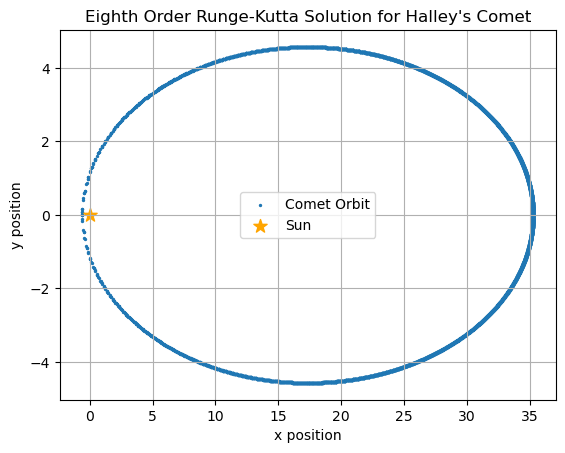

In [529]:
x_RK8 = sol_RK8.y[0]
y_RK8 = sol_RK8.y[1]

plt.scatter(-x_RK8, y_RK8, s = 2, label = 'Comet Orbit')
plt.scatter(0, 0, color = 'orange', marker = '*', s = 100, label = 'Sun')
plt.grid()
plt.legend()
plt.title("Eighth Order Runge-Kutta Solution for Halley's Comet")
plt.xlabel('x position')
plt.ylabel('y position')

In [530]:
sol_RK2 = solve_ivp(halley_motion, t_span, initial_conditions, method='RK23', dense_output=True, max_step = 0.05)

Text(0, 0.5, 'y position')

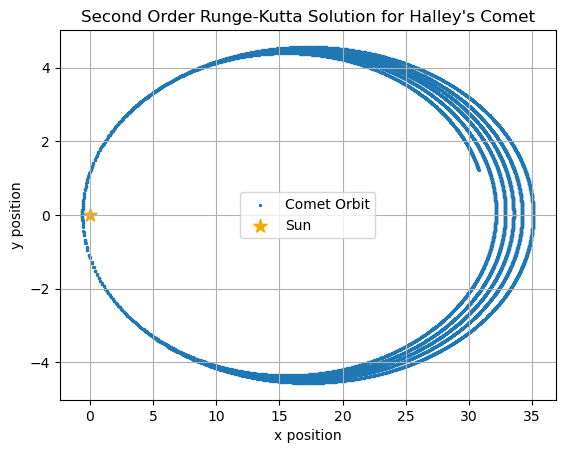

In [531]:
x_RK2 = sol_RK2.y[0]
y_RK2 = sol_RK2.y[1]

plt.scatter(-x_RK2, y_RK2, s = 2, label = 'Comet Orbit')
plt.scatter(0, 0, color = 'orange', marker = '*', s = 100, label = 'Sun')
plt.grid()
plt.legend()
plt.title("Second Order Runge-Kutta Solution for Halley's Comet")
plt.xlabel('x position')
plt.ylabel('y position')

In [532]:
sol_BDF = solve_ivp(halley_motion, t_span, initial_conditions, method='BDF', dense_output=True, max_step = 0.05)

Text(0, 0.5, 'y position')

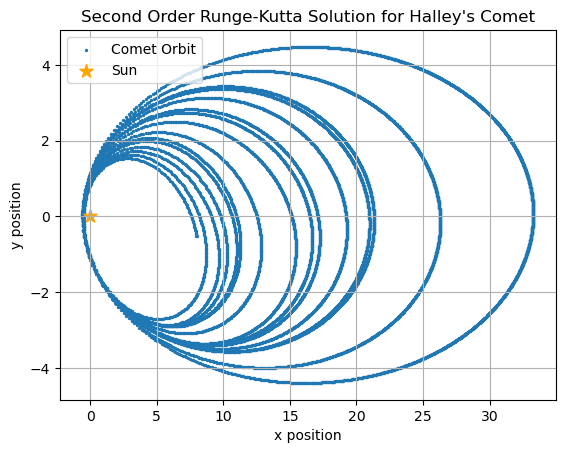

In [533]:
x_BDF = sol_BDF.y[0]
y_BDF = sol_BDF.y[1]

plt.scatter(-x_BDF, y_BDF, s = 2, label = 'Comet Orbit')
plt.scatter(0, 0, color = 'orange', marker = '*', s = 100, label = 'Sun')
plt.grid()
plt.legend()
plt.title("Second Order Runge-Kutta Solution for Halley's Comet")
plt.xlabel('x position')
plt.ylabel('y position')

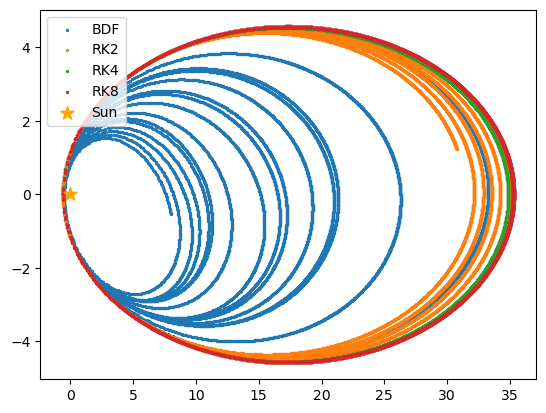

In [534]:
plt.figure()
plt.scatter(-x_BDF, y_BDF, s = 2, label = 'BDF')
plt.scatter(-x_RK2, y_RK2, s = 2, label = 'RK2')
plt.scatter(-x_RK4, y_RK4, s = 2, label = 'RK4')
plt.scatter(-x_RK8, y_RK8, s = 2, label = 'RK8')
plt.scatter(0, 0, color = 'orange', marker = '*', s = 100, label = 'Sun')
plt.legend()

In [565]:
t_span = (0, P * 1000)

In [567]:
sol_RK8 = solve_ivp(halley_motion, t_span, initial_conditions, method='DOP853', dense_output=True, max_step = 0.05)

Text(0, 0.5, 'y position')

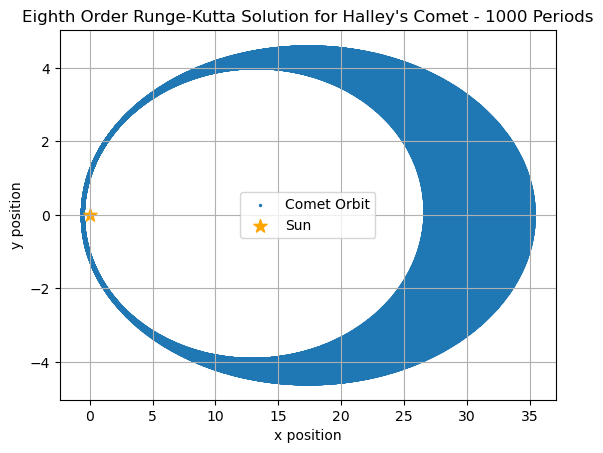

In [568]:
x_RK8 = sol_RK8.y[0]
y_RK8 = sol_RK8.y[1]

plt.scatter(-x_RK8, y_RK8, s = 2, label = 'Comet Orbit')
plt.scatter(0, 0, color = 'orange', marker = '*', s = 100, label = 'Sun')
plt.grid()
plt.legend()
plt.title("Eighth Order Runge-Kutta Solution for Halley's Comet - 1000 Periods")
plt.xlabel('x position')
plt.ylabel('y position')